<a href="https://colab.research.google.com/github/Sajeenafiza/ML-capstone/blob/main/ML_capstone_minePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Classification/Unsupervised ML
##### **Contribution**    - Individual
##### **Project done by**- Sajeena T R


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

import contractions
import string
import re
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Dataset Loading

In [ ]:
# Load Dataset
hotel_df=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# hotel  data
hotel_df.head()

In [ ]:
# review data
review_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# rows&columns of hotel data
print("The rows and columns for restaurant data:")
print(hotel_df.shape)

In [8]:
# Dataset Rows & Columns count
# rows&columns of review data
print("The rows and columns for review data:")
review_df.shape

The rows and columns for review data:


(10000, 7)

### Dataset Information

In [9]:
# Dataset Info
# data types and non-null objects of hotel data
print("Restaurant info:")
print()
hotel_df.info()

Restaurant info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
# Dataset Info
# data types and non-null objects of review data
print("Review info:")
print()
review_df.info()

Review info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("The duplicate value for restaurant data: ",hotel_df.duplicated().sum())


The duplicate value for restaurant data:  0


In [12]:
# Dataset Duplicate Value Count
print("The duplicate value for review data: ",review_df.duplicated().sum())

print("The duplicate values are:\n")
review_df[review_df.duplicated()]

The duplicate value for review data:  36
The duplicate values are:



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print("Missing values in restaurant data:\n")
hotel_df.isnull().sum()

Missing values in restaurant data:



Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [14]:
# Missing Values/Null Values Count
print("Missing values in review data:\n")
review_df.isnull().sum()

Missing values in review data:



Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

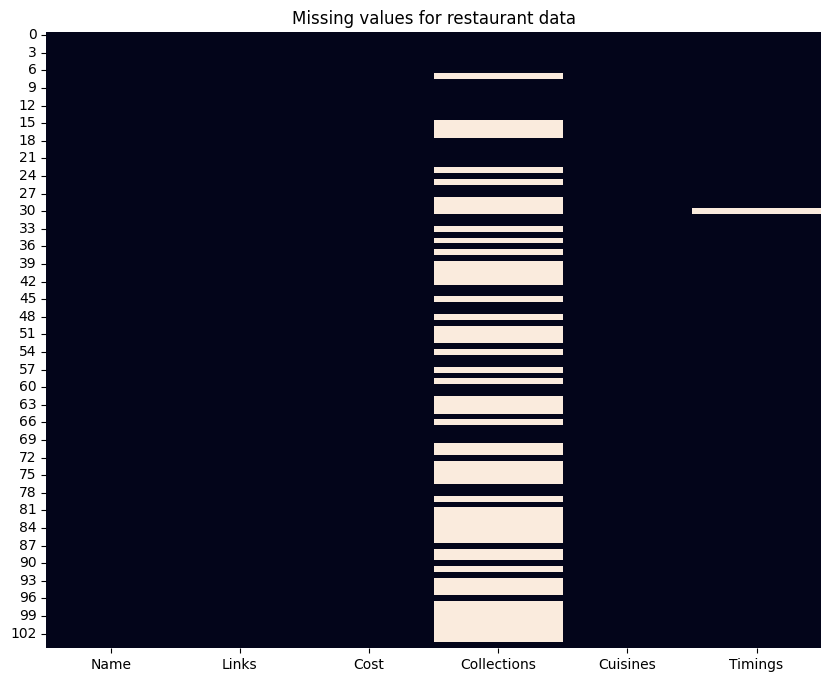

In [15]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(hotel_df.isnull(),cbar=False)
plt.title("Missing values for restaurant data")
plt.show()

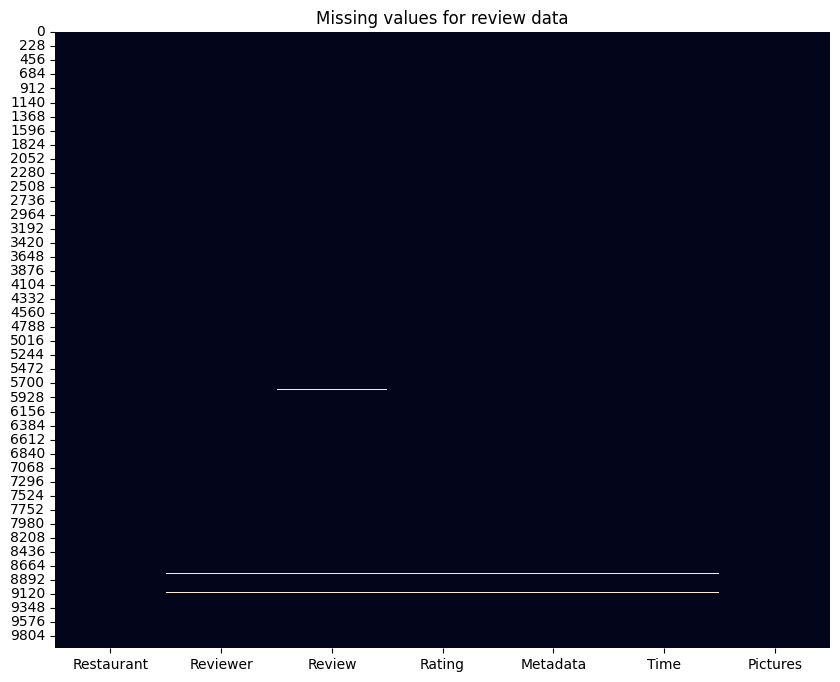

In [16]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(review_df.isnull(),cbar=False)
plt.title("Missing values for review data")
plt.show()

### What did you know about your dataset?

**Restaurant data**

This dataset consists of information about 105 restaurants with 6 features.

Datatypes of all the columns is string object.

No duplicate values are present.

Contains 54 missing values in Collections column and 1 missing value in Timings column.


**Review data**

This dataset consists of information about 10000 reviews about the 105 restaurants with 7 features.

Datatypes of all the columns is string object except Pictures.

Contains 36 duplicate values.

All the columns contain  missing values except  Restaurant and Pictures column.


## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
print("The features in the restaurant data: \n")
print(hotel_df.columns)
print()
print("The features in the review data: \n")
print(review_df.columns)

The features in the restaurant data: 

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

The features in the review data: 

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [18]:
# summary of dataset
print("Summary of restaurant data:\n")
hotel_df.describe()

Summary of restaurant data:



,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [19]:
# summary of dataset
print("Summary of review data:\n")
review_df.describe()

Summary of review data:



,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

**Restaurant Data:**


*   Name: Name of Restaurants
*   Links: URL Links of Restaurants
*   Cost: Per person estimated cost of dining
*   Collection: Tagging of Restaurants w.r.t. Zomato categories
*   Cuisines: Cuisines served by restaurants
*   Timings: Restaurant timings


**Review Data:**

*   Reviewer: Name of the reviewer
*   Review: Review text
*   Rating: Rating provided
*   MetaData: Reviewer metadata - Number of reviews and followers
*   Time: Date and Time of Review
*   Pictures: Number of pictures posted with review


### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
# unique values for restaurant data
print("Unique values for restaurant data\n")
for val in hotel_df.columns.to_list():
  print("Unique values for" , val,hotel_df[val].nunique())

print()
# unique values for review data
print("Unique values for review  data\n")
for val in review_df.columns.to_list():
  print("Unique values for" , val,review_df[val].nunique())

Unique values for restaurant data

Unique values for Name 105
Unique values for Links 105
Unique values for Cost 29
Unique values for Collections 42
Unique values for Cuisines 92
Unique values for Timings 77

Unique values for review  data

Unique values for Restaurant 100
Unique values for Reviewer 7446
Unique values for Review 9364
Unique values for Rating 10
Unique values for Metadata 2477
Unique values for Time 9782
Unique values for Pictures 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.

# making copies of the restaurant and review datasets
hotel=hotel_df.copy()
review=review_df.copy()

###Removing duplicates

In [22]:
# removing the duplicated for review data
review.drop_duplicates(inplace=True)

# checking for duplicates value
review.duplicated().sum()

0

In [23]:
review.shape,hotel.shape

((9964, 7), (105, 6))

###Handling missing values

In [24]:
# handling missing value in Restaurant data

# percentage of null values in collections column
(hotel['Collections'].isnull().sum()/len(hotel))*100

51.42857142857142

51% of values are null in the Collections column.So we can drop Collections column.

In [25]:
# dropping the Collections column
hotel.drop('Collections',axis=1,inplace=True)

In [26]:
# the number of features reduced from 6 to 5
hotel.shape

(105, 5)

In [27]:
# only one value is missing in the Timings column.So dropping that value
hotel.dropna(inplace=True)

In [28]:
# handling missing value in Review data

review.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [29]:
# only few na values are in some columns.So dropping that columns
review.dropna(inplace=True)

In [30]:
# all the null values are removed in both dataset
print("Null values in restaurant data\n",review.isnull().sum())
print("Null values in review data\n",hotel.isnull().sum())

Null values in restaurant data
 Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64
Null values in review data
 Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


###Datatype conversion

In [31]:
# checking the datatypes
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [32]:
# the datatype for "Cost" feature is string.Convert that to int
hotel['Cost']=hotel['Cost'].str.replace(',','').astype(int)

In [33]:
# datatype of Cost column changed to int
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    int64 
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.9+ KB


In [34]:
# estimated cost is in the range of Rs.150 and Rs.2800
hotel['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  700,  900, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [35]:
# max cost is 2800 and min is 150
hotel.Cost.describe()

count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [36]:
# extracting individual cuisines, and then creating a set of unique cuisines.

# creates a new column 'cuisine_list'
hotel['cuisine_list']=hotel['Cuisines'].apply(lambda x: x.replace(' ','').split(','))

# initializes the empty set
cuisine=set()

# iterates through the 'cuisine_list' column and  updates the 'cuisine' set by adding all the cuisines present in each list
for cus in hotel.cuisine_list:
  cuisine.update(cus)

print("Unique cuisines:", cuisine)
print("The no. of unique cuisines:",len(cuisine))



Unique cuisines: {'Kebab', 'American', 'Italian', 'SouthIndian', 'Juices', 'Andhra', 'Thai', 'Hyderabadi', 'NorthIndian', 'FastFood', 'Asian', 'Chinese', 'Burger', 'Lebanese', 'Desserts', 'Mexican', 'Seafood', 'Japanese', 'StreetFood', 'Indonesian', 'Mediterranean', 'Mughlai', 'Continental', 'Pizza', 'FingerFood', 'Wraps', 'Goan', 'Beverages', 'Cafe', 'Arabian', 'Momos', 'European', 'Spanish', 'Salad', 'ModernIndian', 'NorthEastern', 'Malaysian', 'Mithai', 'Bakery', 'BBQ', 'HealthyFood', 'Biryani', 'Sushi', 'IceCream'}
The no. of unique cuisines: 44


In [37]:
# checking the datatypes for the review data
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [38]:
# datatype for rating is string.so we have to convert this to float

# unique values for Rating columns
review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [39]:
# no. of 'Like' values
review['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [40]:
#converts the 'Rating' column to numeric type. The parameter errors='coerce' tells pandas to convert any values that cannot be parsed as numbers to NaN instead of raising an error.
review['Rating']=pd.to_numeric(review['Rating'],errors='coerce')

In [41]:
# fills the NaN values in the 'Rating' column with the median of the non-NaN values.
review['Rating'].fillna(review['Rating'].median(),inplace=True)

In [42]:
# datatype of Rating column changed to float
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
 6   Pictures    9955 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.2+ KB


In [43]:
#extracting details from Metadata column

# splitting the Metadata column to two columns 'Total_review' and 'Total_followers'
review['Total_review'],review['Total_followers']=review['Metadata'].str.split(',').str

# converting the values to numeric type
review['Total_review']=pd.to_numeric(review['Total_review'].str.split(' ').str[0])  #after splitting first part will be Total_review
review['Total_followers']=pd.to_numeric(review['Total_followers'].str.split(' ').str[1]) #after splitting second part will be Total_followers

<ipython-input-43-a14710efbfdc>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Total_review'],review['Total_followers']=review['Metadata'].str.split(',').str


In [44]:
#extracting details from Time column

# converts the 'Time' column to a datetime data type
review['Time']=pd.to_datetime(review['Time'])

#  extracts the year component from the datetime objects
review['review_Year']=pd.DatetimeIndex(review['Time']).year

#  extracts the month component from the datetime objects
review['review_month']=pd.DatetimeIndex(review['Time']).month

#  extracts the hour component from the datetime objects
review['review_hour']=pd.DatetimeIndex(review['Time']).hour

# three new columns 'review_Year','review_month' and 'review_hour' are created


In [45]:
# removing the Metadata column
review.drop('Metadata',axis=1,inplace=True)

In [46]:
# merging the two dataframes hotel and review
df_merge=pd.merge(hotel[['Name','Cost','cuisine_list']],review,left_on='Name',right_on='Restaurant')
df_merge

,Name,Cost,cuisine_list,Restaurant,Reviewer,Review,Rating,Time,Pictures,Total_review,Total_followers,review_Year,review_month,review_hour
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI...",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,15
1,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI...",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,14
2,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI...",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,22
3,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI...",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,22
4,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI...",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Chinese Pavilion,1000,"[Chinese, Seafood]",Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0,53,54.0,2016,6,0
9851,Chinese Pavilion,1000,"[Chinese, Seafood]",Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0,2,53.0,2016,6,22
9852,Chinese Pavilion,1000,"[Chinese, Seafood]",Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3,65,423.0,2016,6,10
9853,Chinese Pavilion,1000,"[Chinese, Seafood]",Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0,13,144.0,2016,5,17


### What all manipulations have you done and insights you found?


**Restaurant data**

*   51% of values are null in the Collections column.So  
     dropped  Collections column.Dropped the missing value in the Timings column.

*  Converted the datatype of "Cost" feature into int.

*  Extracted cuisines from the Cuisines column.


*   Estimated cost of dining of all restaurants are  in the range of
     Rs. 150 and Rs.2800

*   There are 44 unique cuisines across 104 restaurants.

**Review data**

*   Removed the duplicate values and null values.

*   Converted the datatype of "rating" feature from object to float for precise analysis.

*   Split the Metadata column to two new columns 'Total_review' and 'Total_followers' and converted the data type into int and float.
*   Extracted year,month and hour components from Time column and converted the datatype to datetime.


Finally combined the two dataframes hotel and review and stored it in a variable df_merge.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##Univariate analysis

### Distribution of Cost and Rating

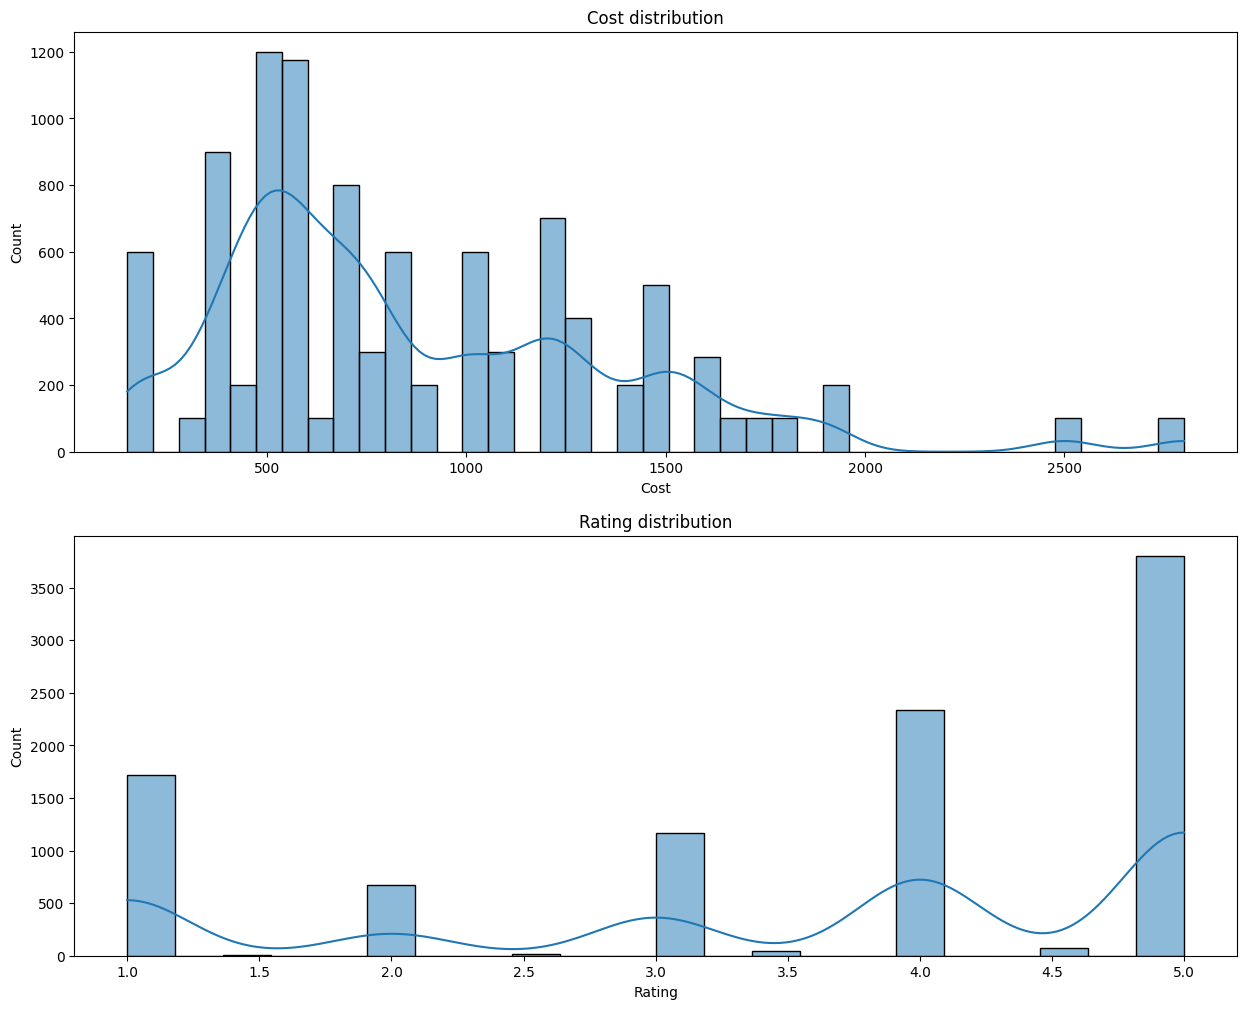

In [47]:
# Chart - 1 visualization code
# cost distribution plotting
fig,ax=plt.subplots(2,1,figsize=(15,12))
sns.histplot(df_merge['Cost'],ax=ax[0],kde=True) #using the histplot for cost
ax[0].set_title("Cost distribution")          #title

# Rating distribution plotting
sns.histplot(df_merge['Rating'],ax=ax[1],kde=True) #using the histplot for Rating
ax[1].set_title("Rating distribution")             #title
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of the data. By looking at the shape of the histograms, we can quickly assess whether the data is normally distributed or  skewed. The mean std can be visually estimated from the histograms.

##### 2. What is/are the insight(s) found from the chart?



*   Cost distribution shows skewness.The most common  per person estimated
     cost of dining at the restaurant is around Rs.500.

*   We can see two peaks in the Rating distribution at 4 and 5 indicating a       majority of postitive ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Insights gained from the cost and rating distributions can indeed have a
positive impact on the business.

* Knowing that the most common per person estimated cost of dining at the restaurant is around Rs. 500 allows the business to optimize its pricing strategy. They can adjust menu prices to align with this price point.  This can attract more diners and increase overall revenue.

*  Positive ratings indicate satisfied customers. This positive perception can enhance the restaurant's reputation on Zomato, attracting more customers and fostering loyalty among existing ones.


These insights also lead to negative growth.

*   If the restaurant relies heavily on a Rs. 500 price point but faces increasing cost pressures, maintaining profitability may become challenging without adjusting prices.
*  Maintaining consistent quality across all aspects of the dining experience is crucial for sustaining positive ratings. If there are inconsistencies in food quality or service,  it can lead to negative reviews.

#### Chart - 2

###Most popular cuisines

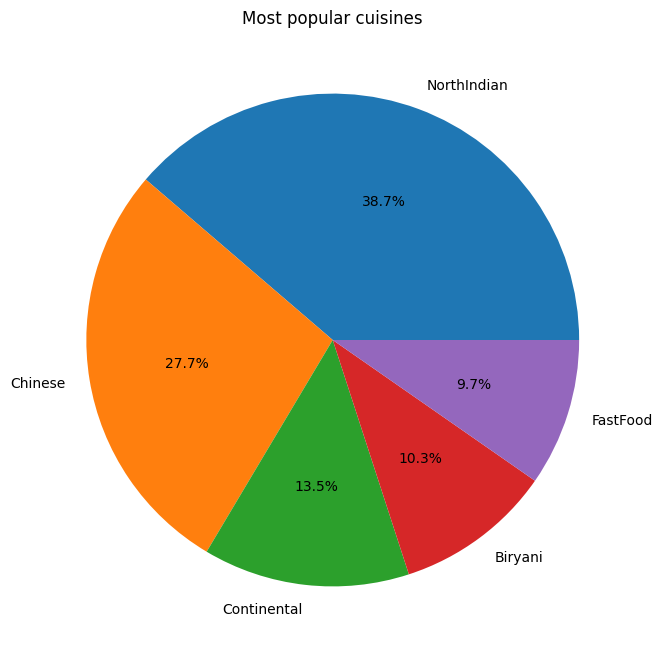

In [48]:
# Chart - 2 visualization code
#finding the number of cuisines in all restaurants

# initializing an empty list
cuisine_res=[]
# iterating the cuisine_list and appending the cuisine name to the empty list
for cuisi in hotel.cuisine_list:
  for  cui in cuisi:
    cuisine_res.append(cui)

# converting the list of cuisines to series and finding the value_counts
cuisine_count=pd.Series(cuisine_res).value_counts()

# top 5 cuisines
cuisine_counts=cuisine_count.head(5)
# plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')

plt.title("Most popular cuisines")    #title
plt.show()


##### 1. Why did you pick the specific chart?

 Pie charts are effective for showing proportions or percentages of a whole. In this case, we are interested in understanding the proportion of each cuisine type relative to the total count of cuisines. Pie charts make it easy to compare the relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

The most popular cuisine is North Indian food followed by Chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the significant portion of customers are searching for North Indian food, Zomato could focus on adding more North Indian restaurants to its platform and promoting them to customers.The restaurant can allocate more resources to sourcing high-quality ingredients, hiring skilled chefs, and developing innovative dishes in the North Indian food category to meet customer demand.Similary hotels can offer diverse menu in Chinese category also. Satisfied customers are more likely to leave positive reviews on platforms like Zomato, which can attract new customers and improve the restaurant's overall rating and reputation.

Relying too heavily on North Indian and Chinese cuisines could lead to a lack of diversity in the menu offerings. It's important for Zomato to consider other customers when making strategic decisions.

#### Chart - 3

###Top5 most engaged restaurants and least engaged restaurants

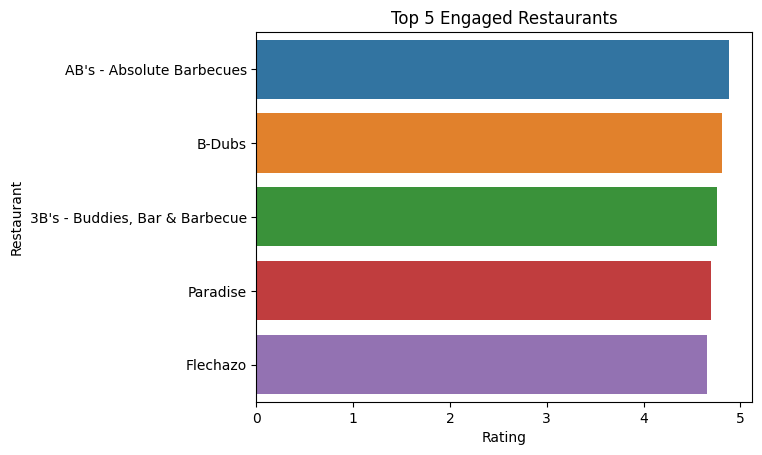

In [49]:
# finding the restaurants with the most average rating
rate_range = df_merge.groupby('Restaurant').agg({'Rating':'mean'}).reset_index()

# top5 restaurants
rate_range.sort_values('Rating',ascending=False).head(5)
# plotting the bar graph
sns.barplot(rate_range.sort_values('Rating',ascending=False).head(5), x = 'Rating', y = 'Restaurant',hue='Restaurant')
plt.title('Top 5 Engaged Restaurants')
plt.show()

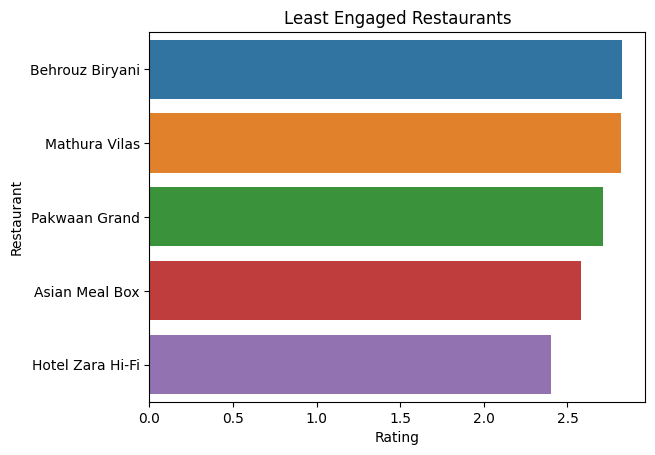

In [50]:
 # finding the restaurants with the least average rating
sns.barplot(rate_range.sort_values('Rating',ascending=False).tail(5), x = 'Rating', y = 'Restaurant',hue='Restaurant')
plt.title('Least Engaged Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is used for plotting the above graph because it shows frequency levels for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's-Absolute Barbecues, shows maximum engagement as it has maximum   average rating  and Hotel Zara Hi-Fi shows lowest engagement as it has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

AB's - Absolute Barbecues, with its high average rating and maximum engagement, can leverage this positive reputation to attract more customers. Positive reviews and high ratings on platforms like Zomato can serve as powerful marketing tools, influencing potential diners to choose AB's over competitors.

Some restaurant show less rating which can show negative growth.

#### Chart - 4

##Bivariate

###Top 5 expensive and affordable restaurants

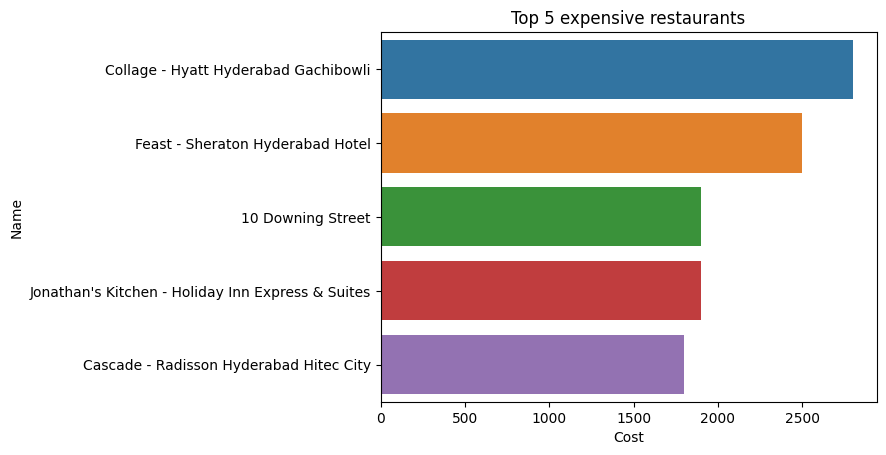

In [51]:
# Chart - 4 visualization code
# sorting the hotels w.r.t cost
hotel_cost = hotel.sort_values('Cost', ascending = False)[['Name','Cost']]

# plotting the bar graph
sns.barplot(data = hotel_cost.head(5), x = "Cost", y='Name', hue='Name')
plt.title('Top 5 expensive restaurants')
plt.show()

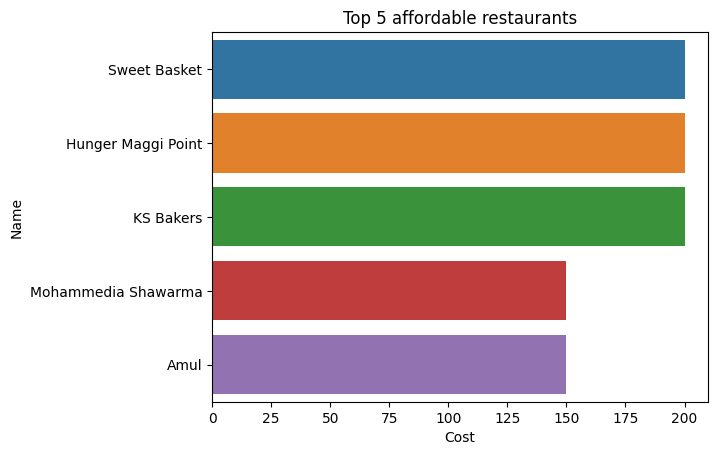

In [52]:
# plotting the 5 affordable hotels with the bar graph
sns.barplot(data = hotel_cost.tail(5), x = "Cost", y='Name', hue='Name')
plt.title('Top 5 affordable restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar graph allows for easy comparison between different restaurants in terms of their cost.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that, Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant in the locality which has a price of 2800 for order.

Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While Collage-Hyatt Hyderabad may cater to upscale customers, Amul and Mohammedia Shawarma can attract budget-conscious diners with their lower prices. This diversification in pricing can help capture a broader customer base.Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.

Restaurants like Amul and Mohammedia Shawarma, with their lower prices, may put competitive pressure on Collage - Hyatt Hyderabad Gachibowli. If customers perceive similar value in the dining experiences offered by these less expensive options, they may choose to dine there instead, leading to a loss of customers and revenue for Collage.

#### Chart - 5

###Most followed reviewer

In [53]:
# finding the most followed reviewer

top_reviewers= review.groupby('Reviewer').agg({'Total_review':'max','Total_followers':'max',
              'Rating':'mean'}).reset_index().rename(columns = {'Rating':'avg_rating'})
# finding the top 5 reviewers with most no. of followers
top_review_followers=top_reviewers.sort_values('Total_followers', ascending = False).head(5)

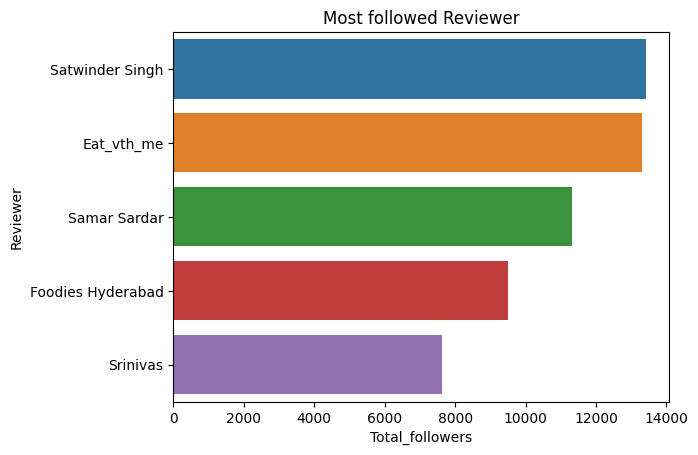

In [54]:
# Chart - 5 visualization code
# visualization code for most followed reviewer
sns.barplot(data =top_review_followers , x = 'Total_followers',
            y = 'Reviewer',hue='Reviewer')
plt.title('Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of their follower counts

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that, Satwinder Singh and Eat_vth_me are the top two reviewers with the largest number of followers,indicating that their reviews have the potential to influence a larger audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a large number of followers, Zomato could focus on promoting their reviews to customers.Positive reviews and recommendations from influential reviewers like Satwinder Singh and Eat_vth_me can serve as powerful endorsements for businesses.

This dependency can be risky, as negative reviews or a loss of interest from these reviewers could negatively impact the business's reputation and growth.

#### Chart - 6

###Reviewers with most review

In [55]:
# finding the reviewers with most review
top_review_max=top_reviewers.sort_values('Total_review', ascending = False).head(5)

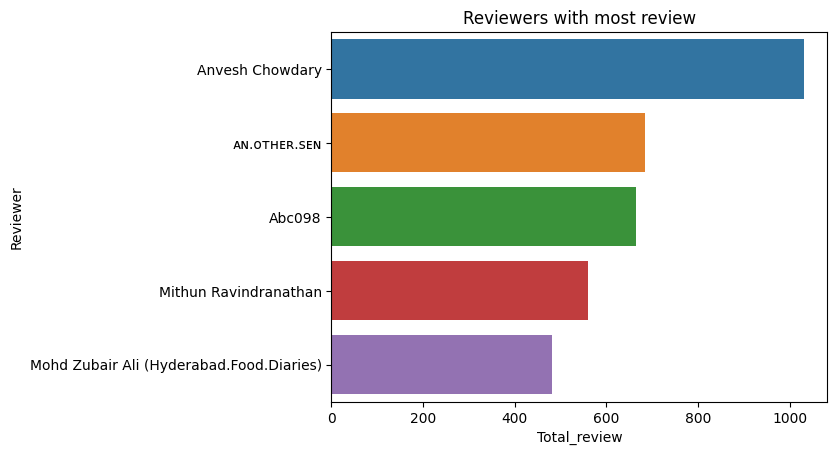

In [56]:
# Chart - 6 visualization code
# visualization code for finding the reviewers with most review
sns.barplot(data =top_review_max , x = 'Total_review',
            y = 'Reviewer',hue='Reviewer')
plt.title('Reviewers with most review')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of the number of reviews they have written.

##### 2. What is/are the insight(s) found from the chart?

Anvesh Chowdary and AN.OTHER.SEN are the top 2 reviewers in terms of the number of reviews they have written.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The large number of reviews written by Anvesh Chowdary and AN.OTHER.SEN can serve as social proof for businesses.Their reviews can increase the visibility of businesses.

 Their opinions may not always be unbiased. Businesses may face negative growth if customers perceive reviews from these reviewers  as biased or untrustworthy, leading to a loss of credibility and trust in the business.

#### Chart - 7

###Average Ratings given by most followed Reviewer

In [57]:
# finding the reviewers with high avg rating a

top_review_avg=review.groupby('Reviewer')[['Rating', 'Total_followers']].mean()
avg_rate=top_review_avg.sort_values('Total_followers', ascending=False).head(5)

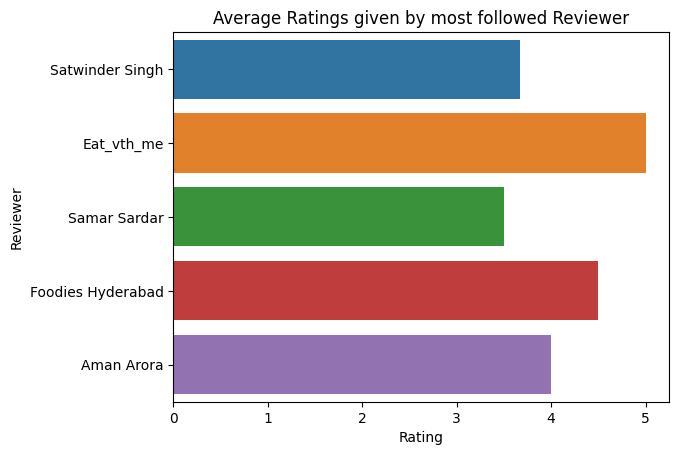

In [58]:
# Chart - 7 visualization code
# visualization code for finding the average Ratings given by most followed Reviewer
sns.barplot(data =avg_rate , x = 'Rating',y = 'Reviewer',hue='Reviewer')
plt.title('Average Ratings given by most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph allows for easy comparison between different reviewers in terms of their average ratings.Each bar represents a reviewer, and the height of the bar corresponds to their average rating.

##### 2. What is/are the insight(s) found from the chart?

 Reviewers like 'eat_vth_me' has consistently given an average rating of 5 and Foodies Hyderabad has given 4.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistently high ratings from influential reviewers like 'eat_vth_me' can contribute to a positive reputation for the businesses they review.

Over-dependency on individual reviewers can be risky, as changes in their reviewing behavior or preferences could impact businesses' reputation and growth.

#### Chart - 8

###Variation of Rating with Cost

<ipython-input-59-7600596e0d3a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cost_Bin', y='Rating', data=df_merge,palette=colors)


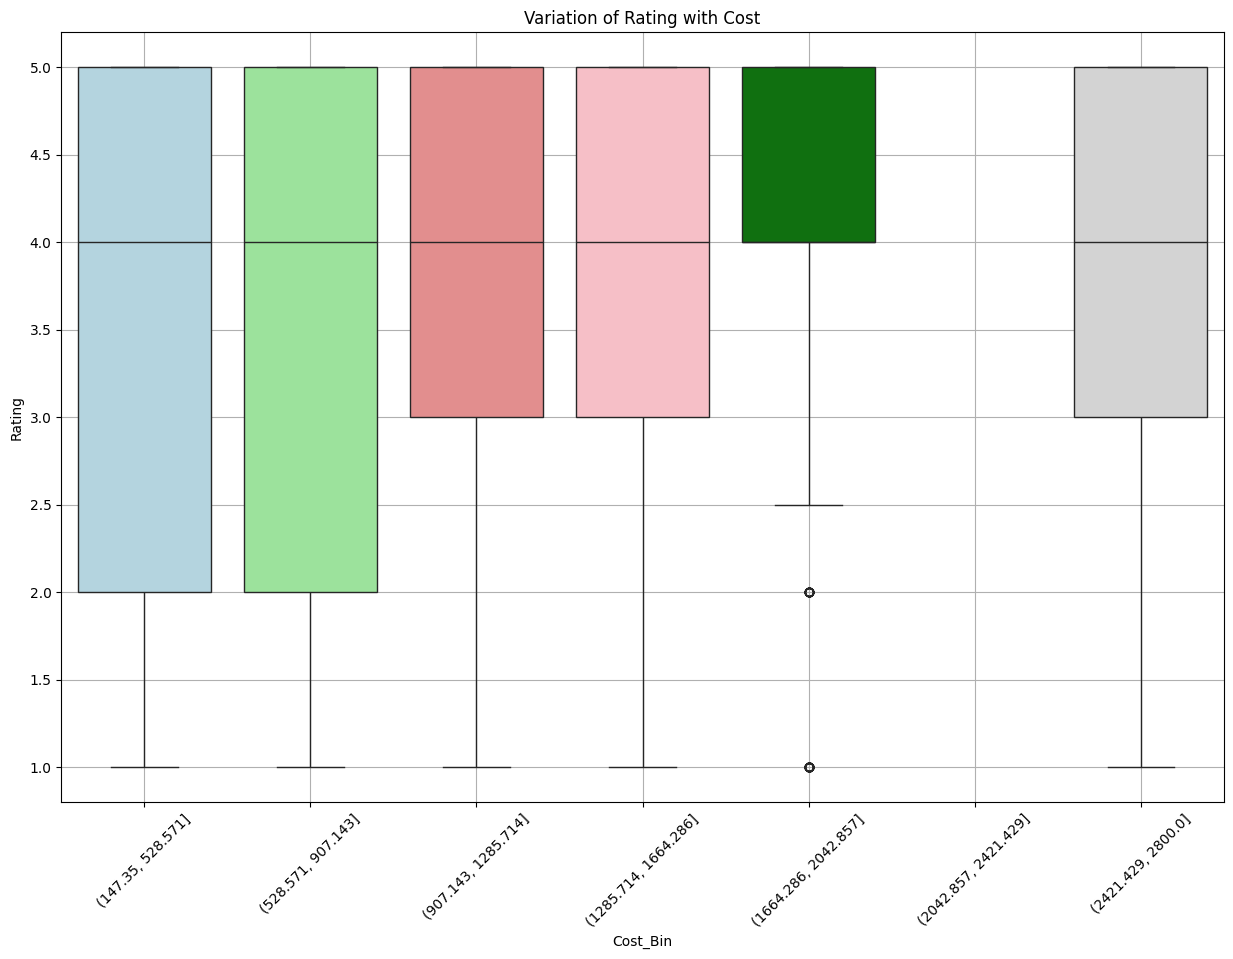

In [59]:
# Chart - 8 visualization code

# Creating a box plot for variation of rating with cost
plt.figure(figsize=(15, 10))
# Create 7 bins for the 'Cost' column
df_merge['Cost_Bin'] = pd.cut(df_merge['Cost'], bins=7)

# boxplot with 'Cost_bin' in x axis and rating in y axis
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'green','lightyellow' , 'lightgrey']
sns.boxplot(x='Cost_Bin', y='Rating', data=df_merge,palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Rating with Cost')   #adding title
plt.grid(True)  # Adding grid lines for better visualization
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot allows you to compare the distribution of ratings across different cost ranges easily.Outliers are clearly identified in the boxplot. Outliers can indicate unusual or exceptional cases such as restaurants with exceptionally high or low ratings relative to their cost.

##### 2. What is/are the insight(s) found from the chart?

The highest cost bin [(2421, 2800)] shows the highest median rating, which could suggest that more expensive restaurants tend to receive better ratings, possibly due to quality, service, or experience.

The outliers indicates that there are some restaurants with ratings that are significantly lower than the typical range of ratings for their cost category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Higher ratings for more expensive restaurants may suggest to potential customers that these establishments offer superior quality, service, or overall dining experience.


Outliers, especially in the highest cost bin, suggest that high prices alone do not guarantee high ratings. Poor experiences at expensive restaurants may lead to significantly lower ratings due to higher customer expectations associated with higher costs.

#### Chart - 9

###Average Ratings by month and hour

In [60]:
# finding the avg rating by month
monthly_avg_rating = review.groupby('review_month')['Rating'].mean()

# finding the avg rating by hour
hourly_avg_rating = review.groupby('review_hour')['Rating'].mean()

<Figure size 1200x1200 with 0 Axes>

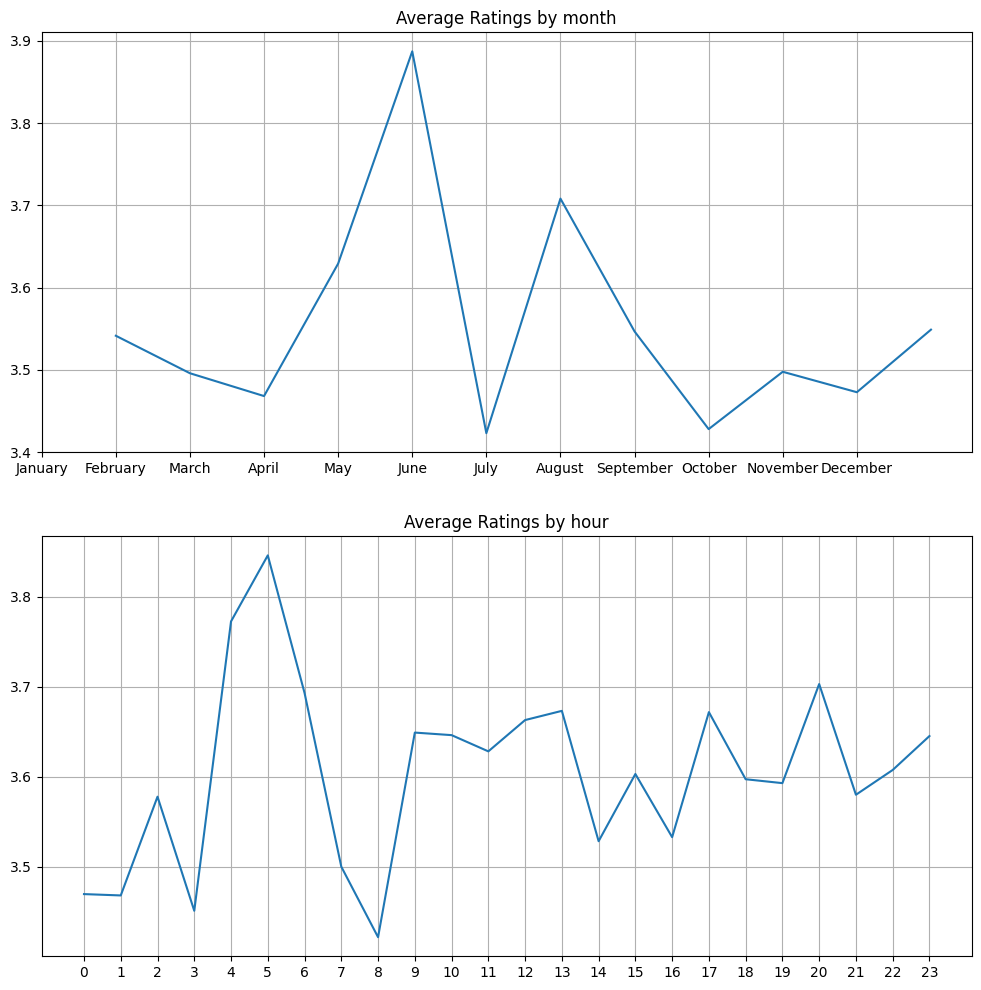

In [61]:
# Chart - 9 visualization code
# plotting the line chart to show avg rating by month
plt.figure(figsize=(12,12))
fig,ax=plt.subplots(2,1,figsize=(12,12))
ax[0].plot(monthly_avg_rating)
# setting the month names for x labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax[0].set_xticks(range(len(month_names)))
ax[0].set_xticklabels(month_names)          # Set ticks at positions corresponding to the months
ax[0].set_title('Average Ratings by month')
ax[0].grid(True)

# plotting the hourly avg rating
ax[1].plot(hourly_avg_rating)
ax[1].set_xticks(range(0, 24))
ax[1].set_title('Average Ratings by hour')

ax[1].grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are effective for examining temporal trends, such as how average ratings vary over different months or hours of the day.Months and hours have a natural sequential order, making them well-suited for representation on the x-axis of a line chart.

##### 2. What is/are the insight(s) found from the chart?

There is a noticeable peak in June, indicating the highest average ratings occur in this month.
There are lower points, particularly in July and October, suggesting a potential seasonal impact on ratings.

There are peaks in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
There are noticeable dips in the late morning (around 7-8 AM) and evening (around 2-4 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

They can focus on promoting special offers, events, or menu items during peak months to capitalize on increased customer satisfaction and engagement.Understanding the patterns of peak and dip in ratings throughout the day allows businesses to optimize their operations and staffing.

Ignoring  the dips in ratings during specific periods could lead to negative growth if customer concerns or dissatisfaction during those times are not addressed promptly.

#### Chart - 10

###Top 10 reviews

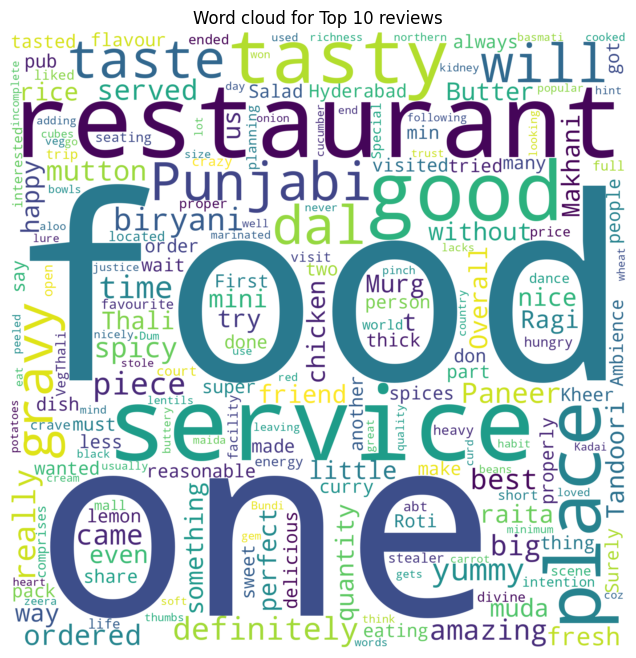

In [62]:
# Chart - 10 visualization code
# Combine the top 10 reviews into a single text
text = " ".join(name for name in review.sort_values('Review', ascending=False).Review[:10])

# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=2000,
    height=2000,
    collocations=False,
    background_color='white'
).generate(text)

 # Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud for Top 10 reviews")

# Display the Word Cloud
plt.show()


##### 1. Why did you pick the specific chart?

Creating a word cloud for the top 10 reviews can provide a visual representation of the most frequent words used in those reviews. This can be useful for quickly identifying common themes, sentiments, or topics that are prominent among the top-rated reviews.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food','one', 'good,'service','tasty', 'restaurant' and 'place' are the most commonly occurring words in the reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that terms like 'food,' 'good,' 'service,' and 'tasty' are frequently mentioned suggests that customers appreciate these aspects of the business.

#### Chart - 11

###Word cloud for negative reviews

In [ ]:
# Creating dataframes for positive and negative reviews
pos_rev = review[review.Rating>= 3]
neg_rev = review[review.Rating< 3]
neg_text=",".join(list(neg_rev['Review'].values))

In [ ]:
# Chart - 11 visualization code
# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=2000,
    height=2000,
    collocations=False,
    background_color='white'
).generate(neg_text)

 # Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud for negative reviews")

# Display the Word Cloud
plt.show()

##### 1. Why did you pick the specific chart?

Creating a word cloud for positive and negative  reviews can provide a visual representation of the most frequent words used in those reviews. This can be useful for quickly identifying common themes, sentiments, or topics that are prominent among the top-rated reviews.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food', 'bad,'service','worst', 'pathetic' and 'chicken' are the most commonly occurring words in the negative reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding the specific pain points mentioned in reviews, such as 'worst' and 'pathetic' service, allows the business to target improvements in customer service processes.


#### Chart - 12

###Rating vs Review Length

In [65]:
#  Creating a review_length column to check the frequency of each rating.
review['Review_length'] = review['Review'].apply(len)

In [ ]:
# Chart - 12 visualization code
# creating a scatter plot to plot the frequency of rating
fig = px.scatter(review, x=review['Rating'], y=review['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.show()


##### 1. Why did you pick the specific chart?

Scatter plots can help visualize the distribution of reviews across different rating levels based on their length. This visualization can reveal patterns or trends in how review length varies with the sentiment conveyed by the rating.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot confirms that length of review doesn't impact ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that review length doesn't significantly impact ratings allows the business to focus its efforts on improving other aspects of its products or services that do influence customer satisfaction and ratings.

#### Chart - 13

###Top 10 Cuisines by Average Cost

In [ ]:
# Calculate the average cost per cuisine

# creating a series of cuisines and converts the Series into a DataFrame with the column name 'Cuisine'.
cuisine_cost = hotel['Cuisines'].str.split(', ').explode().to_frame(name='Cuisine')

# calculates the average cost per cuisine
cuisine_cost['Cost'] = hotel['Cost'] / hotel['Cuisines'].str.count(', ') + 1

# Group and calculate the average cost per cuisine
cuisine_avg_cost = cuisine_cost.groupby('Cuisine')['Cost'].mean()

# Exclude Lebanese cuisine as its value is inf
cuisine_avg_cost = cuisine_avg_cost[cuisine_avg_cost.index != 'Lebanese']

# Select the top 10 cuisines
top_10_cuisines = cuisine_avg_cost.nlargest(10)

In [ ]:
# Chart - 13 visualization code

# Create a bar plot for the top 10 cuisines
plt.figure(figsize=(12, 6))
top_10_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Cost ')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots make it easy to compare the average costs of different cuisines side by side. Each bar represents a cuisine, and the height of the bar corresponds to the average cost.

##### 2. What is/are the insight(s) found from the chart?

It is clear that 'Modern Indian,' 'Sushi,' and 'BBQ' cuisines rank among the most expensive options in terms of cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By catering to the demand for these higher-cost cuisines, the business can potentially increase its revenue and profitability.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df_merge.corr(),  annot=True, cmap='icefire', linewidths=1)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap provides a visual representation of correlation coefficients between pairs of variables.Each cell in the table shows the correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

From the heat map, we can see a strong relation between  Total_review and Total_followers.Also there is a negative relationship between cost and review_month.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_merge)

##### 1. Why did you pick the specific chart?

Pairplots offer a quick overview of the relationships between all pairs of variables in a dataset. Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

We can see  Total_review has a positive  relation with Total_followers and pictures.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

1.  The cost of a restaurant has a  positive correlation with the rating
     it receives.

2.   Restaurants that are reviewed by reviewers with more followers will
     have a higher rating.

3.   Restaurants offering a wide variety of cuisines may receive higher
     ratings.

### Hypothetical Statement - 1

The cost of a restaurant has a positive correlation with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null hypothesis: There is no relationship between the cost of
     restaurant and the rating it receives. (H0: 𝛽1 = 0)

*   Alternative hypothesis: There is a positive relationship between the
     cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

*   Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= df_merge).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost  and the rating.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship between the cost and  the rating.")

##### Which statistical test have you done to obtain P-Value?

The statistical test used here is simple linear regression.

##### Why did you choose the specific statistical test?

Linear regression was chosen because it is a common and straightforward method for testing the relationship between two continuous variables.It assesses the relationship between 'Rating' and 'Cost,' helping determine if cost significantly impacts ratings.The p-value of the coefficient for the cost variable can be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis : The number of followers and a reviewer has no effect
     on the rating of a restaurant.(H0: 𝛽1 = 0)

*  Alternate Hypothesis : There is a positive relation between the number
   of followers and the rating of a restaurant. (H1: 𝛽1 > 0).

*   Test : Simple Linear Regression test





#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

# fit the linear model
model = smf.ols(formula='Rating ~ Total_followers', data= df_merge).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Null Hypothesis is rejected")
else:
    print("Fail to reject Null Hypothesis")

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

 Simple Linear Regression Test is used.

##### Why did you choose the specific statistical test?

Linear regression was chosen because it is a common and straightforward method for testing the relationship between two continuous variables.It assesses the relationship between 'Rating' and 'Total_Followers'.It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.



### Hypothetical Statement - 3

Restaurants offering a wide variety of cuisines may receive higher ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   Null Hypothesis : Restaurants cuisines has no relation with the
     rating.  (H0: 𝛽1 = 0)

*   Alternative hypothesis: The variety of cuisines offered by a
     restaurant has a positive effect on its rating. (H1: 𝛽1 > 0)

*   Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# merging the new hotel data having 'Cuisines' column  with review data
merged=pd.merge(hotel[['Name','Cost','Cuisines']],review,left_on='Name',right_on='Restaurant')

In [ ]:
# creating a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Null Hypothesis is rejected")
else:
    print("Fail to reject Null Hypothesis")

##### Which statistical test have you done to obtain P-Value?

Chi-squared test for independence is used to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?


Chi-squared test is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.The test allows for hypothesis testing to determine whether there is a statistically significant association between the variables, making it a suitable choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# no null values are  for hotel data
print(hotel.isnull().sum())

# null values are present in the Total_followers column
print(review.isnull().sum())

In [ ]:
#checking null in  reviewer
review[review['Reviewer'].isnull()]

In [ ]:
#checking null in Total_review
review[review['Total_review'].isnull()]

In [ ]:
# checking the distribution
sns.distplot(review['Total_followers'],kde=True)
plt.show()

In [ ]:
# median imputation method
median_total_followers = review['Total_followers'].median()
review['Total_followers'].fillna(median_total_followers, inplace=True)

In [ ]:
# null values are removed
print(review.isnull().sum())

#### What all missing value imputation techniques have you used and why did you use those techniques?

The 'Total_followers' column contains 1574 null values.
As the 'Reviewer' and 'Total_review' coulmn has no null values we cannot drop the null values in the 'Total_followers' column.The distribution of 'Total_followers' is skewed.So we can use the median imputation method.

In [ ]:
# after imputation merged the two datasets
df_mergednew=pd.merge(hotel[['Name','Cost','cuisine_list','Cuisines']],review,left_on='Name',right_on='Restaurant')
df_mergednew.isnull().sum()

### 2. Handling Outliers

In [ ]:
# Handling Outliers

#plotting graph for cost
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Cost'].values))
plt.title("Cost distribution")
sns.despine()

In [ ]:
#distribution of cost
sns.distplot(df_mergednew['Cost'])
plt.title("Distribution of Cost")
sns.despine()

In [ ]:
#plot for total_followers
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Total_followers'].values))
# plt.xlabel('index')
# plt.ylabel('Reviewer_Followers')
plt.title("Total_followers distribution")
sns.despine()

<ipython-input-86-71e29d8f368e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




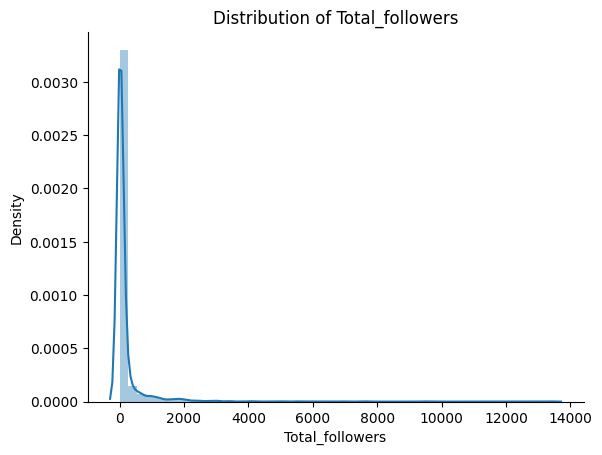

In [86]:
#distribution of Total_followers
sns.distplot(df_mergednew['Total_followers'])
plt.title("Distribution of Total_followers")
sns.despine()

In [ ]:
# Outlier treatments
# defining a function for outlier treatment using IQR method
def outlier_treatment_skew(df,feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR= Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return lower_bound,upper_bound

In [88]:
# Lower Limit Capping for 'Cost' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Cost')
df_mergednew.loc[df_mergednew['Cost'] <= lower_bound, 'Cost'] = lower_bound

# Upper Limit Capping for 'Cost' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Cost')
df_mergednew.loc[df_mergednew['Cost'] >= upper_bound, 'Cost'] = upper_bound

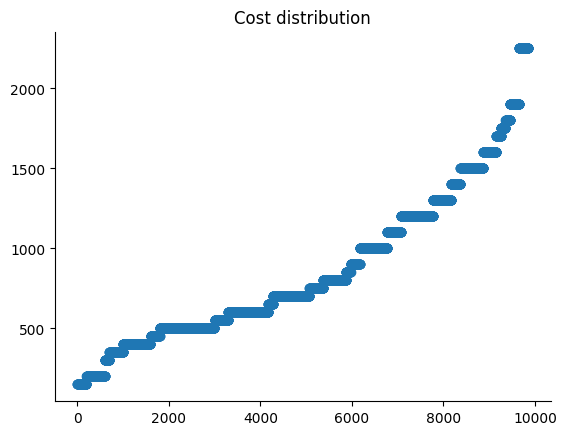

In [89]:
#checking for outlier removal for 'Cost' column
plt.scatter(range(df_mergednew.shape[0]), np.sort(df_mergednew['Cost'].values))
plt.title("Cost distribution")
sns.despine()

In [90]:
# Lower Limit Capping for 'Total_followers' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Total_followers')
df_mergednew.loc[df_mergednew['Cost'] <= lower_bound, 'Total_followers'] = lower_bound

# Upper Limit Capping for 'Total_followers' column
lower_bound, upper_bound = outlier_treatment_skew(df=df_mergednew, feature='Total_followers')
df_mergednew.loc[df_mergednew['Total_followers'] >= upper_bound, 'Total_followers'] = upper_bound

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since Cost and Total_follower column show skewed distribution and using scatter plot  found they have outliers, hence using the capping technique. Instead of removing the outliers, capped outliers with the upper bound and lower bound using IQR method.

### 3. Categorical Encoding

In [91]:
# Encode your categorical columns

# creating dummy df with columns 'Restaurant'and 'Cuisines'
dummy = df_mergednew[['Restaurant','Cuisines']]
# splitting with ','
dummy['Cuisines'] = dummy['Cuisines'].str.split(',')
# converting into unique individual items
dummy = dummy.explode('Cuisines')
# removing extra trailing space
dummy['Cuisines'] = dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies
dummy = pd.get_dummies(dummy, columns=["Cuisines"], prefix=["Cuisines"])


<ipython-input-91-4362e7783bcf>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
# grouping by restaurant
dummy = dummy.groupby("Restaurant").sum().reset_index()
dummy.shape

(99, 43)

In [93]:
#creating a column count of total cuisines
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [94]:
#adding a column  average rating
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean'}).reset_index().rename(columns = {'Rating': 'Average_Rating'})

#  merging to hotel data
hotel = pd.merge(hotel,avg_hotel_rating[['Restaurant','Average_Rating']], left_on = 'Name',right_on='Restaurant')


In [95]:
# merging the dummy with hotel
dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(dummy, on = 'Restaurant')

In [96]:
dummy.shape

(99, 46)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used one hot encoding on the cuisine category and based on the cuisine if present  gave value as 1 and if absent gave value as 0.One-hot encoding preserves the information present in categorical variables without assuming any ordinal relationship between categories.One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

Created Total_Cuisine_Count and Average_Rating and merged with dummy.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [97]:
# Expand Contraction

#creating seniment_df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
# resetting the index
sentiment_df = sentiment_df.reset_index()
# setting index
sentiment_df['index'] = sentiment_df.index

sentiment_df[10:17]

,index,Reviewer,Restaurant,Rating,Review
10,10,Saubhagya Bhuyan,Beyond Flavours,5.0,The service was great and the food was awesome...
11,11,Srivaths07,Beyond Flavours,5.0,"Very good ambience, amazing food ,good service..."
12,12,Kunj Mishra,Beyond Flavours,5.0,Food was very good. Soup was as expected. In s...
13,13,Pradeep Vetapalem,Beyond Flavours,5.0,Food is too good. Telangana kodiak fry is must...
14,14,Kankaria.ritu,Beyond Flavours,1.0,"We ordered corn cheese balls, manchow soup and..."
15,15,Abhay Sharma,Beyond Flavours,5.0,Food and ambience is fantastic.. Waiter Manav ...
16,16,Shubham Jaiswal,Beyond Flavours,4.0,Came here for lunch and the food was good and ...


In [98]:
!pip install contractions

In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [ ]:
sentiment_df['Review'][:5]

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review']=sentiment_df['Review'].str.lower()

In [ ]:
sentiment_df['Review'][:5]

#### 3. Removing Punctuations

In [103]:
# Remove Punctuations

# function for removing punctuations
def remove_punctuation(text):

    # Create a translation table mapping punctuation characters to None
    translator = str.maketrans('', '', string.punctuation)

    # Use translate method to remove punctuation
    text_without_punct = text.translate(translator)

    return text_without_punct

In [104]:
# applying the function in Review column
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [105]:
sentiment_df['Review'][:5]

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [106]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
sentiment_df['Review'][:5]

#### 5. Removing Stopwords & Removing White spaces

In [108]:
# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [109]:
# Remove Stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):

    # Remove stopwords and join the words back into a string
    text = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(text)

In [110]:
# Apply remove_stopwords function to 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)


In [111]:
sentiment_df['Review'][:5]

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object

In [112]:
# Remove White spaces
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:''.join(x.split()))

In [113]:
sentiment_df['Review'][:5]

0    ambiencegoodfoodquitegoodsaturdaylunchcosteffe...
1    ambiencegoodpleasanteveningservicepromptfoodgo...
2    musttrygreatfoodgreatambiencethnxservicepradee...
3    soumendasarungreatguybehaviorsinceretygoodfood...
4    foodgoodweorderedkodidrumsticksbasketmuttonbir...
Name: Review, dtype: object

#### 6. Rephrase Text

In [114]:
# Download WordNet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [115]:
# Rephrase Text

# Function to rephrase text by replacing words with synonyms
def rephrase_text(text):

    # Initialize an empty list to store rephrased words
    rephrased_words = []

    # Iterate through each word
    for word in text.split():
        # Get synonyms for the word from WordNet
        synonyms = []
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())

        # If synonyms are found, replace the word with a random synonym
        if synonyms:
            new_word = synonyms[0]  # Choose the first synonym
            rephrased_words.append(new_word)
        else:
            rephrased_words.append(word)  # If no synonyms found, keep the original word

    # Join the rephrased words back into a string
    rephrased_text = ' '.join(rephrased_words)

    return rephrased_text

In [116]:
# Apply rephrase_text function to 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_text)

In [ ]:
sentiment_df['Review'][:5]

#### 7. Tokenization

In [118]:
# download punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [119]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df['Review'][:5]

#### 8. Text Normalization

In [121]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

In [122]:
sentiment_df['Review'][:5]

0    [ambiencegoodfoodquitegoodsaturdaylunchcosteff...
1    [ambiencegoodpleasanteveningservicepromptfoodg...
2    [musttrygreatfoodgreatambiencethnxserviceprade...
3    [soumendasarungreatguybehaviorsinceretygoodfoo...
4    [foodgoodweorderedkodidrumsticksbasketmuttonbi...
Name: Review, dtype: object

##### Which text normalization technique have you used and why?

Lemmatization is used as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. Lemmatization reduces words to their base form (lemma) based on the word's meaning in context. It uses vocabulary analysis to accurately determine the lemma of a word.Lemmatization generally produces more accurate results compared to stemming because it considers the context and part-of-speech of the word.

#### 9. Part of speech tagging

In [123]:
# Download the averaged_perceptron_tagger if not already downloaded
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [124]:
# POS Taging
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.pos_tag)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

##### Which text vectorization technique have you used and why?

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.
Tf-idf Vectorization technique was used here.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [126]:
# Manipulate Features to minimize feature correlation and create new features
hotel.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'cuisine_list',
       'Total_Cuisine_Count', 'Restaurant', 'Average_Rating'],
      dtype='object')

In [127]:
hotel.shape

(99, 9)

In [128]:
# dropping the 'Name','Links' and 'cuisine_list' columns
hotel=hotel.drop(columns=['Name','Links','cuisine_list'],axis=1)

In [129]:
# dropped the columns
hotel.columns

Index(['Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count', 'Restaurant',
       'Average_Rating'],
      dtype='object')

In [130]:
dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian',
       'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery',
       'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger',
       'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental',
       'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food',
       'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food',
       'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian',
       'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices',
       'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean',
       'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuisines_Momos',
       'Cuisines_Mughlai', 'Cuisines_North Eastern', 'Cuisines_North Indian',
       'Cuisines_Pizza', 'Cuisines_Salad', 'Cuisines_Seafood',
       'Cuisines_South Indian', 'Cuisines_Spanish', 'Cuisines_Street Food',
       'Cuisines_Sush

In [131]:
# dropping the Restaurant column from dummy
dummy=dummy.drop(columns=['Restaurant'],axis=1)

In [132]:
# dropped the column
dummy.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Cuisines_American',
       'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ',
       'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani',
       'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese',
       'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European',
       'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan',
       'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream',
       'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese',
       'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese',
       'Cuisines_Mediterranean', 'Cuisines_Mexican', 'Cuisines_Modern Indian',
       'Cuisines_Momos', 'Cuisines_Mughlai', 'Cuisines_North Eastern',
       'Cuisines_North Indian', 'Cuisines_Pizza', 'Cuisines_Salad',
       'Cuisines_Seafood', 'Cuisines_South Indian', 'Cuisines_Spanish',
       'Cuisines_Street Food', 'Cuisines_Sushi', 'Cuisines_Thai',


In [133]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Total_review', 'Total_followers', 'review_Year', 'review_month',
       'review_hour', 'Review_length'],
      dtype='object')

In [134]:
# dataframe for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

In [135]:
 # For ratings above average we set the value of Sentiment as 1 and below average 0.
sentiment_df['Sentiment']=sentiment_df['Rating'].apply(lambda x:1 if x>=sentiment_df['Rating'].mean() else 0)

In [ ]:
sentiment_df

#### 2. Feature Selection

In [137]:
# Select your features wisely to avoid overfitting
hotel.columns

Index(['Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count', 'Restaurant',
       'Average_Rating'],
      dtype='object')

In [138]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Total_review', 'Total_followers', 'review_Year', 'review_month',
       'review_hour', 'Review_length'],
      dtype='object')

In [139]:
dummy.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Cuisines_American',
       'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ',
       'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani',
       'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese',
       'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European',
       'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan',
       'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream',
       'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese',
       'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese',
       'Cuisines_Mediterranean', 'Cuisines_Mexican', 'Cuisines_Modern Indian',
       'Cuisines_Momos', 'Cuisines_Mughlai', 'Cuisines_North Eastern',
       'Cuisines_North Indian', 'Cuisines_Pizza', 'Cuisines_Salad',
       'Cuisines_Seafood', 'Cuisines_South Indian', 'Cuisines_Spanish',
       'Cuisines_Street Food', 'Cuisines_Sushi', 'Cuisines_Thai',


In [140]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

 PCA method will be used for feature selection and will do in the later step.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<ipython-input-141-21aa088e30ec>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




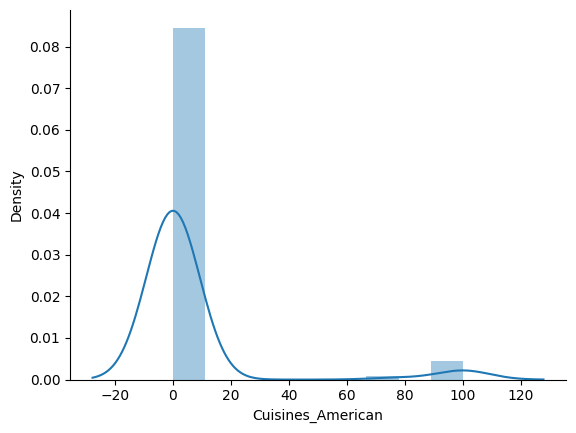

In [141]:
#distribution of Total_followers
sns.distplot(dummy['Cuisines_American'])
# plt.title("Distribution of Total_followers")
sns.despine()

In [142]:
# finding the symmetric and non-symmetric features

# initializing the empty sets
symmetric_feature=[]
non_symmetric_feature=[]
# iterating through the columns of describe function
for i in dummy.describe().columns:
  if abs(dummy[i].mean()-dummy[i].median())<0.1:     #compares the absolute difference between the mean and median to a threshold value of 0.1
    symmetric_feature.append(i)                      #appending to symmetric features list
  else:
    non_symmetric_feature.append(i)                 #appending to non-symmetric features list

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost', 'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean', 'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuisines_Momos', 'Cuisines_Mughlai', 'Cuisines_North Eastern', 'Cuisines_North Indian', 'Cuisines_Pizza', 'Cuisines_Salad', 'Cuisines_Seafood', 'Cuisines_South Indian', 'Cuisines_Spanish', 'Cuisines_Street Food', 'Cuisines_Sushi', 'Cuisines_Thai', 'Cuisines_Wraps']


In [143]:
# Transform the data using log transformation
dummy['Cost'] = np.log1p(dummy['Cost'])

Log transformation is used here to transform the 'Cost' column as it is skewed.Log transformation can help normalize the distribution of skewed data, making it more symmetric. This is particularly useful when dealing with data that has a long tail or is heavily right-skewed.

### 6. Data Scaling

In [144]:
dummy.head()

,Cost,Average_Rating,Total_Cuisine_Count,Cuisines_American,Cuisines_Andhra,Cuisines_Arabian,Cuisines_Asian,Cuisines_BBQ,Cuisines_Bakery,Cuisines_Beverages,...,Cuisines_North Indian,Cuisines_Pizza,Cuisines_Salad,Cuisines_Seafood,Cuisines_South Indian,Cuisines_Spanish,Cuisines_Street Food,Cuisines_Sushi,Cuisines_Thai,Cuisines_Wraps
0,6.685861,4.28,6,0,0,0,0,0,0,0,...,100,0,0,0,100,0,0,0,0,0
1,6.685861,4.70,3,0,0,0,0,0,0,0,...,100,0,0,0,0,0,0,0,0,0
2,7.170888,4.66,4,0,0,0,100,0,0,0,...,100,0,0,0,0,0,0,0,0,0
3,6.685861,3.21,5,0,0,0,0,0,0,100,...,100,0,0,100,0,0,0,0,0,0
4,7.090910,4.34,5,0,0,0,100,0,0,0,...,100,0,0,0,0,0,0,0,0,0


In [145]:
# Scaling ythe numeric columns using StandardScaler
numeric_columns=['Cost',	'Average_Rating',	'Total_Cuisine_Count']
sc=StandardScaler()
sc.fit(dummy[numeric_columns])
dummy_scaled=dummy.copy()
dummy_scaled[numeric_columns]=sc.transform(dummy[numeric_columns])

##### Which method have you used to scale you data and why?

Here StandardScaler is used for data scaling as the numeric columns were normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

With a higher number of features, there's a risk of overfitting the model.  As the number of features increases, the computational cost of clustering algorithm also increases. In addition,due to the  high dimensionality  the clusters become harder to identify.  Therefore, feature reduction becomes crucial to improve model performance.

In [146]:
dummy_scaled.head()

,Cost,Average_Rating,Total_Cuisine_Count,Cuisines_American,Cuisines_Andhra,Cuisines_Arabian,Cuisines_Asian,Cuisines_BBQ,Cuisines_Bakery,Cuisines_Beverages,...,Cuisines_North Indian,Cuisines_Pizza,Cuisines_Salad,Cuisines_Seafood,Cuisines_South Indian,Cuisines_Spanish,Cuisines_Street Food,Cuisines_Sushi,Cuisines_Thai,Cuisines_Wraps
0,0.138417,1.331006,2.470616,0,0,0,0,0,0,0,...,100,0,0,0,100,0,0,0,0,0
1,0.138417,2.158913,-0.008347,0,0,0,0,0,0,0,...,100,0,0,0,0,0,0,0,0,0
2,0.942626,2.080065,0.817974,0,0,0,100,0,0,0,...,100,0,0,0,0,0,0,0,0,0
3,0.138417,-0.778187,1.644295,0,0,0,0,0,0,100,...,100,0,0,100,0,0,0,0,0,0
4,0.810016,1.449278,1.644295,0,0,0,100,0,0,0,...,100,0,0,0,0,0,0,0,0,0


In [147]:
# DImensionality Reduction (If needed)
# applying PCA
features=dummy_scaled.columns
pca=PCA()
pca.fit(dummy_scaled[features])

PCA()

PCA()

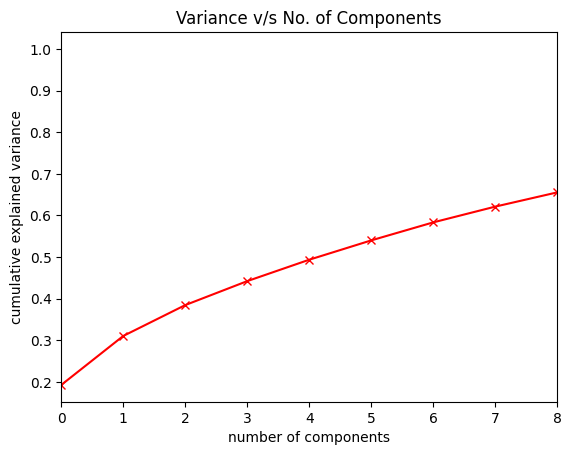

In [162]:
#explained variance v/s no. of components
var_ratio=pca.explained_variance_ratio_
plt.plot(np.cumsum(var_ratio), marker ='x', color = 'red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance',)
plt.title('Variance v/s No. of Components')
plt.xlim([0, 8])
plt.show()

In [168]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(dummy_scaled[features])

# explained variance ratio of each principal component
print('Explained variance: {}'.format(var_ratio))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.1%}'.format(
                                        np.sum(var_ratio)))

# transform data to principal component space
dummy_pca = pca.transform(dummy_scaled[features])

Explained variance: [1.92864550e-01 1.17646886e-01 7.41552344e-02 5.75830330e-02
 5.14099732e-02 4.64398994e-02 4.32577761e-02 3.78371611e-02
 3.42294624e-02 2.93087861e-02 2.75082337e-02 2.50328660e-02
 2.37247246e-02 2.05635015e-02 2.00087278e-02 1.90743283e-02
 1.83338604e-02 1.64963079e-02 1.51912521e-02 1.33445408e-02
 1.25241557e-02 1.22977855e-02 1.09393156e-02 9.74714376e-03
 8.99918302e-03 7.70595463e-03 6.38773398e-03 6.28667655e-03
 5.65802131e-03 4.36014957e-03 3.88214336e-03 3.71980739e-03
 3.55646379e-03 3.22842165e-03 2.97547828e-03 2.68258617e-03
 2.58831010e-03 2.40268040e-03 2.09665569e-03 1.76254825e-03
 1.64940466e-03 5.05976101e-04 2.10631044e-05 1.10981338e-05
 1.38703727e-07]
Cumulative variance explained by 3 principal components: 100.0%


In [170]:
print(dummy_scaled.shape)
print(dummy_pca.shape)

(99, 45)
(99, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible.PCA (Principal Component Analysis) is a widely used dimensionality reduction method, which is used here. In this particular case, PCA was employed to reduce the dimensionality to 3 based on the characteristics of the elbow curve.

The cumulative variance by 3 components is 100%.This means that all the variance in the dataset is captured by the three principal components, implying no loss of information.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***